# Materialien zu <i>zufall</i>

Autor: Holger Böttcher - hbomat@posteo.de

## Aufgaben 17 - Simulation (Ehepaare)

<br>
<i>Die Aufgabe wurde entnommen aus<br>
<br>
LS Stochastik<br>
Grundkurs<br>
Klett Verlag 1986<br>
S. 32 Aufgabe 1</i><br>
<br><br>
Der Schweizer Mathematiker Daniel Bernoulli versuchte um 1760 ein Modell für die<br>
Dauer von Ehen aufzustellen. Dabei spielte in der damaligen Zeit die Möglichkeit der<br>
Ehescheidung keine Rolle, denn Ehen wurden nach dem Prinzip "bis dass der Tod euch<br>
scheidet" geschlossen. Damals war jedoch die Sterblichkeit sehr hoch, sodass die Dau- <br>
er von Ehen vor allem hiervon abhing
<br><br>
Wir betrachten 10 Ehepaare, wobei die Ehepartner ungefähr gleich alt sein sollen. Die<br>
Sterblichkeit bei Frauen und Männern werde als gleich angesehen. Innerhalb eines ge-<br>
wissen Zeitraumes sterben "zufällig" 10 der 20 Personen 
<br><br>
Wie viele Paare sind darunter, d.h. wie viele Ehen bestehen auch noch nach dem be-<br>
trachteten Zeitraum?<br><br>
Wie groß ist die Wahrscheinlichkeit dafür, dass unter den 10 überlebenden Personen<br>
0, 1, 2, 3, 4, 5 Paare sind?
<br>

In [1]:
%run zufall/start

Das Problem ist äquivalent zu dem, die Paare unter den verstorbenen zu betrachten

Die anfangs vorhandenen Paare sind [die Partner sind einzeln aufgeführt ($0$ - Mann, <br>
$1$ - Frau), z.B. ist das 3. Paar $(0, \;3)$ und $(1,\; 3)$]

In [2]:
paare = [ (i, j) for i in (0, 1) for j in range(1, 11) ]; paare

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 1
0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1
, 10)]

10 zufällig verstorbene Personen sind (die Verwendung einer Funktion erleichtert<br>
die Arbeit)

In [3]:
def verstorben():
    tot = zuf_zahl((1, 20), 10, w=ohne)   # ohne Wiederholung
    paare_tot = []
    for z in tot:
        if z <= 10:
            paare_tot += [(0, z)]         # 1...10 - Mann
        else:
            paare_tot += [(1, z-10)]      # 11...20 - Frau            
    return paare_tot                       

In [4]:
verstorben()

[(1, 8), (0, 6), (1, 5), (0, 9), (0, 2), (0, 10), (0, 4), (1, 1), (0, 5), (1, 
2)]

Zur Feststellung der Paare werden die Paarnummern (das 2. Element in jeder Liste)<br>
separiert, die Liste sortiert und eine entsprechende Funktion bereitgestellt und ange-<br>
wendet

In [5]:
sorted([x[1] for x in verstorben()])   # doppelte Zahl entspricht einem Paar

[1, 2, 3, 4, 5, 6, 7, 7, 8, 8]

In [6]:
def anzahl_paare(v):    # v - verstorben()-Liste
    vv = sorted([x[1] for x in v])
    anz = 0
    for i in range(9):
        if vv[i+1] == vv[i]:
            anz += 1
    return anz

In [7]:
ve = verstorben()    
ve, anzahl_paare(ve)   # Kontrole   

([(1, 4), (0, 8), (1, 9), (0, 3), (0, 7), (0, 1), (1, 7), (1, 10), (1, 8), (0,
 9)], 3)

Die <b>Simulation</b> wird mit $n$ solchen Listen durchgeführt, dabei werden die absoluten<br>
Häufigkeiten gesammelt und anschliessend die Verteilung der relativen Häufigkeiten<br>
berechnet

In [9]:
n = 10000   # wiederholen

absH = { x:0 for x in range(6) }   
       # in diesem dict werden die absoluten Häufigkeiten für 
       # die möglichen Werte  0, 1, 2, ... , 5  gesammelt       
for i in range(n):
    ve = verstorben() 
    anz = anzahl_paare(ve)
    absH[anz] += 1
    
absH

{0: 67, 1: 1221, 2: 4340, 3: 3701, 4: 663, 5: 8}

In [10]:
relH = dict( [ (k, Rational(absH[k], n)) for k in absH ] )
relH

⎧     67       1221     217      3701      663            ⎫
⎨0: ─────, 1: ─────, 2: ───, 3: ─────, 4: ─────, 5: 1/1250⎬
⎩   10000     10000     500     10000     10000           ⎭

Die Bereitstellung einer Zufallsgröße auf der Basis dieser Verteilung erlaubt weitere<br>
Betrachtungen zum Thema

In [11]:
zg = ZG(relH)

In [12]:
zg.erw_(d=2), zg.P(2, d=4)

(2.37, 0.434)

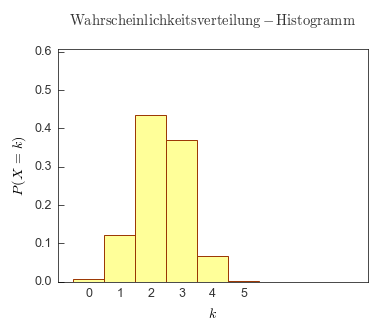

In [13]:
zg.hist

Die <b>Simulation</b> kann auch einfach mit einer <b>DatenReihe</b> erfolgen, deren Attribute<br>
und Methoden dann verwendet werden können

In [14]:
n = 10000
simulation = [ anzahl_paare(verstorben()) for i in range(n) ]

dr = DR(simulation)

In [15]:
dr.n, dr.daten[:10]   # die ersten 10 Elemente von 10000

(10000, [2, 1, 3, 3, 2, 2, 3, 2, 3, 4])

In [16]:
dr.vert

⎧     53               4331     1817      713        19 ⎫
⎨0: ─────, 1: 1/8, 2: ─────, 3: ────, 4: ─────, 5: ─────⎬
⎩   10000             10000     5000     10000     10000⎭

In [17]:
dr.mittel_(), dr.hh(2, d=4)

(2.3761, 0.4331)

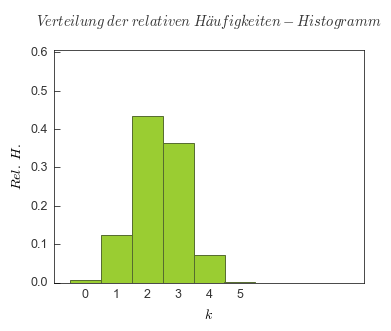

In [18]:
dr.hist